In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
#%matplotlib ipympl 
randomtype=1
inputLocation="Prince George"
Lpoint=50
Hpoint=400
NewDepth=4

In [2]:
#weather=pd.read_excel("Kamloops(Kelowna)_weather_2012_2017_V2.xlsx",index_col="time")
weather=pd.read_excel("Prince_George_weather_2012_2017_V2.xlsx")
weather.apply(pd.isnull).sum()/weather.shape[0]

time                   0.0
Temperature_Max        0.0
Temperature_Avg        0.0
Temperature_Min        0.0
DewPoint_Max           0.0
DewPoint_Avg           0.0
DewPoint_Min           0.0
Humidity_Max           0.0
Humidity_Avg           0.0
Humidity_Min           0.0
WindSpeed_Max          0.0
WindSpeed_Avg          0.0
WindSpeed_Min          0.0
Pressure_Max           0.0
Pressure_Avg           0.0
Pressure_Min           0.0
Precipitation_Total    0.0
dtype: float64

In [3]:
wild_fire=pd.read_excel("FireData.xlsx")
wild_fire.apply(pd.isnull).sum()/weather.shape[0]

Year              0.0
Fire Number       0.0
Fire Centre       0.0
Latitude          0.0
Longitude         0.0
Geographic        0.0
Discovery Date    0.0
Size (ha)         0.0
dtype: float64

In [4]:
weather

,time,Temperature_Max,Temperature_Avg,Temperature_Min,DewPoint_Max,DewPoint_Avg,DewPoint_Min,Humidity_Max,Humidity_Avg,Humidity_Min,WindSpeed_Max,WindSpeed_Avg,WindSpeed_Min,Pressure_Max,Pressure_Avg,Pressure_Min,Precipitation_Total
0,2012-01-01,36,9.0,-2,27,5.5,-6,93,86.0,70,18,6.1,0,28.0,27.9,27.6,0
1,2012-01-02,37,35.2,32,30,16.4,0,100,78.8,56,24,9.3,0,27.5,27.4,27.4,0
2,2012-01-03,43,38.0,32,34,18.9,0,100,76.0,57,33,16.1,0,27.5,27.4,27.4,0
3,2012-01-04,45,42.2,36,34,15.8,0,93,69.3,61,30,18.3,7,27.4,27.3,27.2,0
4,2012-01-05,36,31.9,27,30,21.6,0,93,83.5,70,14,10.9,6,27.7,27.6,27.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2017-12-27,1,-7.3,-22,-2,-11.5,-29,92,81.7,69,6,1.4,0,28.0,27.9,27.9,0
2188,2017-12-28,1,-14.1,-27,-2,-19.0,-35,92,78.9,69,18,8.0,0,28.0,27.9,27.7,0
2189,2017-12-29,0,-3.9,-6,-4,-10.0,-13,85,75.1,65,15,11.2,8,27.9,27.8,27.6,0
2190,2017-12-30,-6,-10.8,-18,-9,-16.7,-24,84,75.3,65,8,4.0,0,28.0,27.9,27.6,0


In [5]:
wild_fire

,Year,Fire Number,Fire Centre,Latitude,Longitude,Geographic,Discovery Date,Size (ha)
0,2012,C10075 (2012),Cariboo,52 44.747,124 22.619,Bald Face Mountain,2012-07-14,13.0
1,2012,C10118 (2012),Cariboo,52 41.849,123 00.607,Quesnel-Merston Creek,2012-07-19,6.0
2,2012,C10247 (2012),Cariboo,53 03.159,122 58.020,11B Road Blackwater,2012-10-17,20.0
3,2012,C10250 (2012),Cariboo,52 30.773,122 26.629,Margeurite,2013-03-30,8.0
4,2012,C20005 (2012),Cariboo,52 07.676,121 54.904,150 Mile House-330 Valley Rd,2012-04-07,12.2
...,...,...,...,...,...,...,...,...
1102,2017,N11966 (2017),Southeast,49 03.584,114 18.149,Kenow Mountain,2017-09-01,15448.8
1103,2017,N11999 (2017),Southeast,49 37.324,115 42.039,St. Mary's River,2017-09-01,398.0
1104,2017,N22003 (2017),Southeast,50 20.706,115 35.956,White-Moscow Creek,2017-09-01,61.3
1105,2017,N12018 (2017),Southeast,49 05.652,114 42.177,Cabin Creek-Modified Response,2017-09-02,98.0


In [6]:
mask =wild_fire['Fire Centre'].isin({inputLocation})
mask

0       False
1       False
2       False
3       False
4       False
        ...  
1102    False
1103    False
1104    False
1105    False
1106    False
Name: Fire Centre, Length: 1107, dtype: bool

In [7]:
wild_fire_New_location=wild_fire[mask]
wild_fire_New_location

,Year,Fire Number,Fire Centre,Latitude,Longitude,Geographic,Discovery Date,Size (ha)
21,2012,G10064 (2012),Prince George,53 56.211,122 42.280,End of Hoferkamp Road,2012-05-14,6.7
22,2012,G40009 (2012),Prince George,54 00.775,124 15.058,Giesbrecht Pit Road,2012-04-20,27.3
23,2012,G50407 (2012),Prince George,54 38.066,125 22.996,Ruby Rock Park,2012-08-19,15.0
24,2012,G60264 (2012),Prince George,55 05.706,123 30.385,20 miles West of Mackenzie,2012-07-25,39.2
25,2012,G60395 (2012),Prince George,58 28.751,126 32.182,Split Top Mountain,2012-08-17,473.0
...,...,...,...,...,...,...,...,...
1056,2017,G92012 (2017),Prince George,59 44.538,121 18.212,Kil Creek,2017-09-01,135.0
1057,2017,G92057 (2017),Prince George,59 01.481,120 56.823,5 mile se kotcho,2017-09-04,173.2
1058,2017,G92068 (2017),Prince George,57 44.434,123 41.362,Sleeping Chief Mountain,2017-09-06,173.5
1059,2017,G92151 (2017),Prince George,58 45.934,124 56.490,10 miles East of Toad River,2017-09-16,11.7


In [8]:
wild_fire_New_location.dtypes


Year                       int64
Fire Number               object
Fire Centre               object
Latitude                  object
Longitude                 object
Geographic                object
Discovery Date    datetime64[ns]
Size (ha)                float64
dtype: object

In [9]:
wild_fire_New_location=wild_fire_New_location.sort_values(by="Discovery Date")

In [10]:
wild_fire_New_location

,Year,Fire Number,Fire Centre,Latitude,Longitude,Geographic,Discovery Date,Size (ha)
40,2012,G80002 (2012),Prince George,56 08.009,120 03.485,Clayhurst,2012-04-08,5.0
22,2012,G40009 (2012),Prince George,54 00.775,124 15.058,Giesbrecht Pit Road,2012-04-20,27.3
29,2012,G70018 (2012),Prince George,55 42.994,121 12.984,East Pine,2012-04-30,17.7
30,2012,G70021 (2012),Prince George,55 42.735,121 29.409,East of Chetwynd,2012-05-03,54.3
31,2012,G70023 (2012),Prince George,55 38.648,121 34.924,Asleson Road,2012-05-05,9.8
...,...,...,...,...,...,...,...,...
1056,2017,G92012 (2017),Prince George,59 44.538,121 18.212,Kil Creek,2017-09-01,135.0
1057,2017,G92057 (2017),Prince George,59 01.481,120 56.823,5 mile se kotcho,2017-09-04,173.2
1058,2017,G92068 (2017),Prince George,57 44.434,123 41.362,Sleeping Chief Mountain,2017-09-06,173.5
1059,2017,G92151 (2017),Prince George,58 45.934,124 56.490,10 miles East of Toad River,2017-09-16,11.7


In [11]:
wild_fire_New_location=wild_fire_New_location.rename(columns={'Discovery Date': 'time'})

In [12]:

for x in range(1,10):
    print(x)


1
2
3
4
5
6
7
8
9


In [13]:
wild_fire_New_location

,Year,Fire Number,Fire Centre,Latitude,Longitude,Geographic,time,Size (ha)
40,2012,G80002 (2012),Prince George,56 08.009,120 03.485,Clayhurst,2012-04-08,5.0
22,2012,G40009 (2012),Prince George,54 00.775,124 15.058,Giesbrecht Pit Road,2012-04-20,27.3
29,2012,G70018 (2012),Prince George,55 42.994,121 12.984,East Pine,2012-04-30,17.7
30,2012,G70021 (2012),Prince George,55 42.735,121 29.409,East of Chetwynd,2012-05-03,54.3
31,2012,G70023 (2012),Prince George,55 38.648,121 34.924,Asleson Road,2012-05-05,9.8
...,...,...,...,...,...,...,...,...
1056,2017,G92012 (2017),Prince George,59 44.538,121 18.212,Kil Creek,2017-09-01,135.0
1057,2017,G92057 (2017),Prince George,59 01.481,120 56.823,5 mile se kotcho,2017-09-04,173.2
1058,2017,G92068 (2017),Prince George,57 44.434,123 41.362,Sleeping Chief Mountain,2017-09-06,173.5
1059,2017,G92151 (2017),Prince George,58 45.934,124 56.490,10 miles East of Toad River,2017-09-16,11.7


In [14]:
full_wild_fire = pd.merge(wild_fire_New_location, weather, on='time', how='inner')
full_wild_fire

,Year,Fire Number,Fire Centre,Latitude,Longitude,Geographic,time,Size (ha),Temperature_Max,Temperature_Avg,...,Humidity_Max,Humidity_Avg,Humidity_Min,WindSpeed_Max,WindSpeed_Avg,WindSpeed_Min,Pressure_Max,Pressure_Avg,Pressure_Min,Precipitation_Total
0,2012,G80002 (2012),Prince George,56 08.009,120 03.485,Clayhurst,2012-04-08,5.0,55,38.3,...,86,55.2,24,17,7.2,0,28.1,28.0,27.9,0
1,2012,G40009 (2012),Prince George,54 00.775,124 15.058,Giesbrecht Pit Road,2012-04-20,27.3,52,44.6,...,76,47.1,24,20,11.4,3,27.8,27.6,27.3,0
2,2012,G70018 (2012),Prince George,55 42.994,121 12.984,East Pine,2012-04-30,17.7,48,43.6,...,100,90.2,76,13,7.3,2,27.3,27.2,27.1,0
3,2012,G70021 (2012),Prince George,55 42.735,121 29.409,East of Chetwynd,2012-05-03,54.3,50,42.4,...,100,79.0,47,17,5.7,0,27.4,27.4,27.3,0
4,2012,G70023 (2012),Prince George,55 38.648,121 34.924,Asleson Road,2012-05-05,9.8,54,44.4,...,75,47.5,33,18,9.0,2,27.9,27.9,27.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,2017,G92012 (2017),Prince George,59 44.538,121 18.212,Kil Creek,2017-09-01,135.0,70,58.8,...,87,63.4,35,13,6.3,0,27.7,27.7,27.6,0
374,2017,G92057 (2017),Prince George,59 01.481,120 56.823,5 mile se kotcho,2017-09-04,173.2,70,49.3,...,100,14.3,0,7,2.8,0,28.0,27.9,27.8,0
375,2017,G92068 (2017),Prince George,57 44.434,123 41.362,Sleeping Chief Mountain,2017-09-06,173.5,73,51.2,...,100,21.7,0,6,1.1,0,27.7,27.7,27.5,0
376,2017,G92151 (2017),Prince George,58 45.934,124 56.490,10 miles East of Toad River,2017-09-16,11.7,66,36.9,...,100,16.3,0,9,1.6,0,27.6,27.6,27.4,0


In [15]:
full_wild_fire.apply(pd.isnull).sum()/full_wild_fire.shape[0]

Year                   0.0
Fire Number            0.0
Fire Centre            0.0
Latitude               0.0
Longitude              0.0
Geographic             0.0
time                   0.0
Size (ha)              0.0
Temperature_Max        0.0
Temperature_Avg        0.0
Temperature_Min        0.0
DewPoint_Max           0.0
DewPoint_Avg           0.0
DewPoint_Min           0.0
Humidity_Max           0.0
Humidity_Avg           0.0
Humidity_Min           0.0
WindSpeed_Max          0.0
WindSpeed_Avg          0.0
WindSpeed_Min          0.0
Pressure_Max           0.0
Pressure_Avg           0.0
Pressure_Min           0.0
Precipitation_Total    0.0
dtype: float64

In [16]:
full_wild_fire["time2"]=full_wild_fire["time"]
full_wild_fire=full_wild_fire.set_index("time")
full_wild_fire["day_of_year"]=full_wild_fire.index.day_of_year
full_wild_fire["month"]=full_wild_fire.index.month
full_wild_fire["week"]=full_wild_fire.index.week

C:\Users\shahab\AppData\Local\Temp\ipykernel_5616\2760637675.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  full_wild_fire["week"]=full_wild_fire.index.week


In [17]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [18]:
train= full_wild_fire[:"2015-12-31"]
test= full_wild_fire["2016-1-1":]

In [19]:
full_wild_fire

,Year,Fire Number,Fire Centre,Latitude,Longitude,Geographic,Size (ha),Temperature_Max,Temperature_Avg,Temperature_Min,...,WindSpeed_Avg,WindSpeed_Min,Pressure_Max,Pressure_Avg,Pressure_Min,Precipitation_Total,time2,day_of_year,month,week
time,,,,,,,,,,,,,,,,,,,,,
2012-04-08,2012,G80002 (2012),Prince George,56 08.009,120 03.485,Clayhurst,5.0,55,38.3,23,...,7.2,0,28.1,28.0,27.9,0,2012-04-08,99,4,14
2012-04-20,2012,G40009 (2012),Prince George,54 00.775,124 15.058,Giesbrecht Pit Road,27.3,52,44.6,34,...,11.4,3,27.8,27.6,27.3,0,2012-04-20,111,4,16
2012-04-30,2012,G70018 (2012),Prince George,55 42.994,121 12.984,East Pine,17.7,48,43.6,37,...,7.3,2,27.3,27.2,27.1,0,2012-04-30,121,4,18
2012-05-03,2012,G70021 (2012),Prince George,55 42.735,121 29.409,East of Chetwynd,54.3,50,42.4,34,...,5.7,0,27.4,27.4,27.3,0,2012-05-03,124,5,18
2012-05-05,2012,G70023 (2012),Prince George,55 38.648,121 34.924,Asleson Road,9.8,54,44.4,32,...,9.0,2,27.9,27.9,27.7,0,2012-05-05,126,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-01,2017,G92012 (2017),Prince George,59 44.538,121 18.212,Kil Creek,135.0,70,58.8,50,...,6.3,0,27.7,27.7,27.6,0,2017-09-01,244,9,35
2017-09-04,2017,G92057 (2017),Prince George,59 01.481,120 56.823,5 mile se kotcho,173.2,70,49.3,41,...,2.8,0,28.0,27.9,27.8,0,2017-09-04,247,9,36
2017-09-06,2017,G92068 (2017),Prince George,57 44.434,123 41.362,Sleeping Chief Mountain,173.5,73,51.2,41,...,1.1,0,27.7,27.7,27.5,0,2017-09-06,249,9,36


In [20]:
#test

In [21]:
#train

In [22]:
full_wild_fire.apply(pd.isnull).sum()/full_wild_fire.shape[0]

Year                   0.0
Fire Number            0.0
Fire Centre            0.0
Latitude               0.0
Longitude              0.0
Geographic             0.0
Size (ha)              0.0
Temperature_Max        0.0
Temperature_Avg        0.0
Temperature_Min        0.0
DewPoint_Max           0.0
DewPoint_Avg           0.0
DewPoint_Min           0.0
Humidity_Max           0.0
Humidity_Avg           0.0
Humidity_Min           0.0
WindSpeed_Max          0.0
WindSpeed_Avg          0.0
WindSpeed_Min          0.0
Pressure_Max           0.0
Pressure_Avg           0.0
Pressure_Min           0.0
Precipitation_Total    0.0
time2                  0.0
day_of_year            0.0
month                  0.0
week                   0.0
dtype: float64

In [23]:
#predictors = ["Temperature_Max","Temperature_Avg","Temperature_Min","DewPoint_Max","DewPoint_Avg","DewPoint_Min","Humidity_Max","Humidity_Avg","Humidity_Min","WindSpeed_Max","WindSpeed_Avg","WindSpeed_Min","Pressure_Max","Pressure_Avg","Pressure_Min","day_of_year","month","week","Latitude","Longitude"]
predictors = ["Temperature_Max","Temperature_Avg","Temperature_Min","DewPoint_Max","DewPoint_Avg","DewPoint_Min","Humidity_Max","Humidity_Avg","Humidity_Min","WindSpeed_Max","WindSpeed_Avg","WindSpeed_Min","Pressure_Max","Pressure_Avg","Pressure_Min","day_of_year","month","week"]

In [24]:
target="Size (ha)"

In [25]:
reg.fit(train[predictors],train[target])

Ridge(alpha=0.1)

In [26]:
predictions= reg.predict(test[predictors])
predictions

array([3381.15555598, 4895.73656753, 2567.22662188, 3903.39839662,
       2345.63519559, 3721.23632043, 3721.23632043, 3721.23632043,
       3721.23632043, 3721.23632043, 3721.23632043, 3721.23632043,
       3721.23632043, 3721.23632043, 3721.23632043, 3721.23632043,
       3721.23632043, 3721.23632043, 3721.23632043, 3721.23632043,
       3721.23632043, 3721.23632043, 3721.23632043, 3721.23632043,
       3721.23632043, 3721.23632043, 3721.23632043, 3721.23632043,
       3721.23632043, 2654.0736789 , 2654.0736789 , 2654.0736789 ,
       2654.0736789 , 2654.0736789 , 2654.0736789 , 4628.49495245,
       4628.49495245, 1748.61248441, 1598.07071259, 1099.07410513,
       1099.07410513, 1099.07410513, 1099.07410513, 1099.07410513,
       3864.97358667, -935.44170936, 1212.23710357, 1991.10650718,
       3013.90588446, 3013.90588446, 3976.52020943, 2464.49646219,
       2464.49646219, 2464.49646219,  197.87598725, 1469.1235696 ,
       1882.94778079, 1882.94778079, 1882.94778079,  787.78266

In [27]:
combined= pd.concat([test[target],pd.Series(predictions, index=test.index)],axis=1)
combined.columns = ["actual","predictions"]

In [28]:
combined

,actual,predictions
time,,
2016-03-31,50.0,3381.155556
2016-04-01,20.0,4895.736568
2016-04-02,59.1,2567.226622
2016-04-04,29.7,3903.398397
2016-04-08,20.0,2345.635196
...,...,...
2017-09-01,135.0,646.472894
2017-09-04,173.2,9346.953042
2017-09-06,173.5,6542.841067


In [29]:
from sklearn.metrics import mean_absolute_error
error= mean_absolute_error(combined["actual"],combined["predictions"])
error

3079.7705641640355

In [30]:
#combined[:"2017-07-5"].plot()

In [31]:
#combined["2017-07-7":].plot()

In [32]:
#combined.plot()

In [33]:
full_wild_fire.describe()

,Year,Size (ha),Temperature_Max,Temperature_Avg,Temperature_Min,DewPoint_Max,DewPoint_Avg,DewPoint_Min,Humidity_Max,Humidity_Avg,...,WindSpeed_Max,WindSpeed_Avg,WindSpeed_Min,Pressure_Max,Pressure_Avg,Pressure_Min,Precipitation_Total,day_of_year,month,week
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,...,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.0,378.000000,378.000000,378.000000
mean,2014.335979,1610.449947,74.071429,59.391005,44.703704,48.883598,42.384656,32.026455,88.671958,59.815079,...,15.904762,6.737831,0.537037,27.700265,27.619048,27.183598,0.0,174.907407,6.253968,25.478836
std,1.703741,6289.078497,8.926323,7.818225,9.268585,8.008430,9.412443,16.111164,10.203152,13.270466,...,7.338459,3.303655,1.335082,0.127930,0.169434,3.154534,0.0,43.992215,1.520522,6.292248
min,2012.000000,5.000000,46.000000,36.200000,0.000000,19.000000,9.600000,0.000000,48.000000,14.300000,...,0.000000,0.000000,0.000000,27.300000,26.500000,0.000000,0.0,88.000000,3.000000,13.000000
25%,2013.000000,12.125000,68.500000,54.725000,39.000000,43.000000,37.900000,27.000000,82.000000,51.600000,...,10.000000,4.200000,0.000000,27.600000,27.600000,27.500000,0.0,137.000000,5.000000,20.000000
50%,2014.000000,37.450000,75.000000,60.800000,46.000000,52.000000,44.850000,37.000000,88.000000,59.400000,...,14.000000,6.300000,0.000000,27.700000,27.600000,27.600000,0.0,180.000000,6.000000,26.000000
75%,2016.000000,284.225000,81.000000,65.100000,50.000000,55.000000,49.300000,45.000000,100.000000,67.100000,...,20.000000,8.575000,0.000000,27.800000,27.700000,27.600000,0.0,213.750000,8.000000,31.000000
max,2017.000000,62700.000000,91.000000,78.700000,64.000000,63.000000,58.000000,52.000000,100.000000,95.600000,...,40.000000,21.800000,8.000000,28.100000,28.000000,27.900000,0.0,271.000000,9.000000,39.000000


In [34]:
full_wild_fire


,Year,Fire Number,Fire Centre,Latitude,Longitude,Geographic,Size (ha),Temperature_Max,Temperature_Avg,Temperature_Min,...,WindSpeed_Avg,WindSpeed_Min,Pressure_Max,Pressure_Avg,Pressure_Min,Precipitation_Total,time2,day_of_year,month,week
time,,,,,,,,,,,,,,,,,,,,,
2012-04-08,2012,G80002 (2012),Prince George,56 08.009,120 03.485,Clayhurst,5.0,55,38.3,23,...,7.2,0,28.1,28.0,27.9,0,2012-04-08,99,4,14
2012-04-20,2012,G40009 (2012),Prince George,54 00.775,124 15.058,Giesbrecht Pit Road,27.3,52,44.6,34,...,11.4,3,27.8,27.6,27.3,0,2012-04-20,111,4,16
2012-04-30,2012,G70018 (2012),Prince George,55 42.994,121 12.984,East Pine,17.7,48,43.6,37,...,7.3,2,27.3,27.2,27.1,0,2012-04-30,121,4,18
2012-05-03,2012,G70021 (2012),Prince George,55 42.735,121 29.409,East of Chetwynd,54.3,50,42.4,34,...,5.7,0,27.4,27.4,27.3,0,2012-05-03,124,5,18
2012-05-05,2012,G70023 (2012),Prince George,55 38.648,121 34.924,Asleson Road,9.8,54,44.4,32,...,9.0,2,27.9,27.9,27.7,0,2012-05-05,126,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-01,2017,G92012 (2017),Prince George,59 44.538,121 18.212,Kil Creek,135.0,70,58.8,50,...,6.3,0,27.7,27.7,27.6,0,2017-09-01,244,9,35
2017-09-04,2017,G92057 (2017),Prince George,59 01.481,120 56.823,5 mile se kotcho,173.2,70,49.3,41,...,2.8,0,28.0,27.9,27.8,0,2017-09-04,247,9,36
2017-09-06,2017,G92068 (2017),Prince George,57 44.434,123 41.362,Sleeping Chief Mountain,173.5,73,51.2,41,...,1.1,0,27.7,27.7,27.5,0,2017-09-06,249,9,36


In [35]:
full_wild_fire["Size (ha)"].value_counts()


5.0        7
20.0       7
6.0        6
14.0       6
15.0       5
          ..
21518.0    1
102.0      1
185.0      1
27.0       1
173.5      1
Name: Size (ha), Length: 280, dtype: int64

In [36]:
#plt.figure()
#plt.plot(full_wild_fire["Size (ha)"].value_counts(),'bo')

In [37]:
## full_wild_fire["Size (ha)"].where(full_wild_fire['Size (ha)'] <= 300, 1, inplace=True)
#full_wild_fire.loc[full_wild_fire["Size (ha)"] < 300, "Size (ha)"] = 1
full_wild_fire_k=full_wild_fire
full_wild_fire_k['Size (ha)'].mask(full_wild_fire_k['Size (ha)'] <= Lpoint, 1, inplace=True)
full_wild_fire_k['Size (ha)'].mask((full_wild_fire_k["Size (ha)"] > Lpoint) & (full_wild_fire_k["Size (ha)"] < Hpoint),2, inplace=True)
full_wild_fire_k['Size (ha)'].mask(full_wild_fire_k["Size (ha)"] >= Hpoint, 3, inplace=True)
#full_wild_fire_k['Size (ha)'].mask(full_wild_fire["Size (ha)"] >= 400, 3, inplace=True)

#full_wild_fire["Size (ha)"].where((full_wild_fire["Size (ha)"] > 300) & (full_wild_fire["Size (ha)"] < 1300) , 2, inplace=True)
#full_wild_fire["Size (ha)"].where(full_wild_fire["Size (ha)"] >= 1300, 3, inplace=True)

In [38]:
full_wild_fire_k

,Year,Fire Number,Fire Centre,Latitude,Longitude,Geographic,Size (ha),Temperature_Max,Temperature_Avg,Temperature_Min,...,WindSpeed_Avg,WindSpeed_Min,Pressure_Max,Pressure_Avg,Pressure_Min,Precipitation_Total,time2,day_of_year,month,week
time,,,,,,,,,,,,,,,,,,,,,
2012-04-08,2012,G80002 (2012),Prince George,56 08.009,120 03.485,Clayhurst,1.0,55,38.3,23,...,7.2,0,28.1,28.0,27.9,0,2012-04-08,99,4,14
2012-04-20,2012,G40009 (2012),Prince George,54 00.775,124 15.058,Giesbrecht Pit Road,1.0,52,44.6,34,...,11.4,3,27.8,27.6,27.3,0,2012-04-20,111,4,16
2012-04-30,2012,G70018 (2012),Prince George,55 42.994,121 12.984,East Pine,1.0,48,43.6,37,...,7.3,2,27.3,27.2,27.1,0,2012-04-30,121,4,18
2012-05-03,2012,G70021 (2012),Prince George,55 42.735,121 29.409,East of Chetwynd,2.0,50,42.4,34,...,5.7,0,27.4,27.4,27.3,0,2012-05-03,124,5,18
2012-05-05,2012,G70023 (2012),Prince George,55 38.648,121 34.924,Asleson Road,1.0,54,44.4,32,...,9.0,2,27.9,27.9,27.7,0,2012-05-05,126,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-01,2017,G92012 (2017),Prince George,59 44.538,121 18.212,Kil Creek,2.0,70,58.8,50,...,6.3,0,27.7,27.7,27.6,0,2017-09-01,244,9,35
2017-09-04,2017,G92057 (2017),Prince George,59 01.481,120 56.823,5 mile se kotcho,2.0,70,49.3,41,...,2.8,0,28.0,27.9,27.8,0,2017-09-04,247,9,36
2017-09-06,2017,G92068 (2017),Prince George,57 44.434,123 41.362,Sleeping Chief Mountain,2.0,73,51.2,41,...,1.1,0,27.7,27.7,27.5,0,2017-09-06,249,9,36


In [39]:
full_wild_fire_k.describe()


,Year,Size (ha),Temperature_Max,Temperature_Avg,Temperature_Min,DewPoint_Max,DewPoint_Avg,DewPoint_Min,Humidity_Max,Humidity_Avg,...,WindSpeed_Max,WindSpeed_Avg,WindSpeed_Min,Pressure_Max,Pressure_Avg,Pressure_Min,Precipitation_Total,day_of_year,month,week
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,...,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.0,378.000000,378.000000,378.000000
mean,2014.335979,1.661376,74.071429,59.391005,44.703704,48.883598,42.384656,32.026455,88.671958,59.815079,...,15.904762,6.737831,0.537037,27.700265,27.619048,27.183598,0.0,174.907407,6.253968,25.478836
std,1.703741,0.821876,8.926323,7.818225,9.268585,8.008430,9.412443,16.111164,10.203152,13.270466,...,7.338459,3.303655,1.335082,0.127930,0.169434,3.154534,0.0,43.992215,1.520522,6.292248
min,2012.000000,1.000000,46.000000,36.200000,0.000000,19.000000,9.600000,0.000000,48.000000,14.300000,...,0.000000,0.000000,0.000000,27.300000,26.500000,0.000000,0.0,88.000000,3.000000,13.000000
25%,2013.000000,1.000000,68.500000,54.725000,39.000000,43.000000,37.900000,27.000000,82.000000,51.600000,...,10.000000,4.200000,0.000000,27.600000,27.600000,27.500000,0.0,137.000000,5.000000,20.000000
50%,2014.000000,1.000000,75.000000,60.800000,46.000000,52.000000,44.850000,37.000000,88.000000,59.400000,...,14.000000,6.300000,0.000000,27.700000,27.600000,27.600000,0.0,180.000000,6.000000,26.000000
75%,2016.000000,2.000000,81.000000,65.100000,50.000000,55.000000,49.300000,45.000000,100.000000,67.100000,...,20.000000,8.575000,0.000000,27.800000,27.700000,27.600000,0.0,213.750000,8.000000,31.000000
max,2017.000000,3.000000,91.000000,78.700000,64.000000,63.000000,58.000000,52.000000,100.000000,95.600000,...,40.000000,21.800000,8.000000,28.100000,28.000000,27.900000,0.0,271.000000,9.000000,39.000000


In [40]:
#full_wild_fire_k["Size (ha)"].plot()

In [41]:
full_wild_fire_k["Size (ha)"].head(60)

time
2012-04-08    1.0
2012-04-20    1.0
2012-04-30    1.0
2012-05-03    2.0
2012-05-05    1.0
2012-05-06    1.0
2012-05-08    1.0
2012-05-08    1.0
2012-05-11    2.0
2012-05-11    1.0
2012-05-12    1.0
2012-05-13    1.0
2012-05-13    1.0
2012-05-14    1.0
2012-05-14    1.0
2012-05-16    1.0
2012-05-17    1.0
2012-05-20    1.0
2012-05-28    1.0
2012-05-28    1.0
2012-05-28    1.0
2012-05-29    1.0
2012-05-29    1.0
2012-05-29    1.0
2012-05-31    1.0
2012-06-21    1.0
2012-06-22    1.0
2012-06-22    1.0
2012-06-22    3.0
2012-07-05    3.0
2012-07-06    1.0
2012-07-06    1.0
2012-07-07    1.0
2012-07-08    1.0
2012-07-11    3.0
2012-07-11    2.0
2012-07-16    1.0
2012-07-16    2.0
2012-07-22    3.0
2012-07-22    1.0
2012-07-22    1.0
2012-07-23    1.0
2012-07-23    2.0
2012-07-24    1.0
2012-07-24    2.0
2012-07-24    1.0
2012-07-25    3.0
2012-07-25    1.0
2012-07-27    1.0
2012-07-29    1.0
2012-07-30    3.0
2012-07-30    1.0
2012-07-31    1.0
2012-08-03    3.0
2012-08-06    1.0
2012-

In [42]:
full_wild_fire_k["Size (ha)"].tail(60)

time
2016-07-11    2.0
2016-07-13    1.0
2016-07-13    1.0
2016-07-13    1.0
2016-07-14    2.0
2016-08-03    1.0
2016-08-11    1.0
2016-08-11    2.0
2016-08-11    1.0
2016-08-15    2.0
2016-08-18    1.0
2016-08-19    1.0
2017-04-27    1.0
2017-05-07    1.0
2017-05-07    1.0
2017-05-23    3.0
2017-05-30    1.0
2017-05-30    1.0
2017-05-30    1.0
2017-05-30    1.0
2017-05-30    1.0
2017-06-07    2.0
2017-06-08    1.0
2017-07-05    1.0
2017-07-06    1.0
2017-07-07    1.0
2017-07-07    3.0
2017-07-07    3.0
2017-07-07    3.0
2017-07-08    1.0
2017-07-08    3.0
2017-07-08    3.0
2017-07-08    2.0
2017-07-08    2.0
2017-07-08    2.0
2017-07-08    1.0
2017-07-08    1.0
2017-07-08    1.0
2017-07-10    1.0
2017-07-14    3.0
2017-07-15    1.0
2017-08-01    2.0
2017-08-03    3.0
2017-08-06    1.0
2017-08-07    2.0
2017-08-08    2.0
2017-08-08    1.0
2017-08-09    1.0
2017-08-10    2.0
2017-08-15    1.0
2017-08-29    1.0
2017-08-31    1.0
2017-08-31    2.0
2017-09-01    2.0
2017-09-01    1.0
2017-

In [43]:
full_wild_fire_k["Size (ha)"].value_counts()

1.0    213
3.0     85
2.0     80
Name: Size (ha), dtype: int64

In [44]:
#X = full_wild_fire_k[["Temperature_Max","Temperature_Avg","Temperature_Min","DewPoint_Max","DewPoint_Avg","DewPoint_Min","Humidity_Max","Humidity_Avg","Humidity_Min","WindSpeed_Max","WindSpeed_Avg","WindSpeed_Min","Pressure_Max","Pressure_Avg","Pressure_Min","day_of_year","month","week","Latitude","Longitude"]] .values  #.astype(float)

X = full_wild_fire_k[["Temperature_Max","Temperature_Avg","Temperature_Min","DewPoint_Max","DewPoint_Avg","DewPoint_Min","Humidity_Max","Humidity_Avg","Humidity_Min","WindSpeed_Max","WindSpeed_Avg","WindSpeed_Min","Pressure_Max","Pressure_Avg","Pressure_Min","day_of_year","month","week",]] .values  #.astype(float)
X[0:5]


array([[ 55. ,  38.3,  23. ,  25. ,  20.5,  18. ,  86. ,  55.2,  24. ,
         17. ,   7.2,   0. ,  28.1,  28. ,  27.9,  99. ,   4. ,  14. ],
       [ 52. ,  44.6,  34. ,  34. ,  14.1,   0. ,  76. ,  47.1,  24. ,
         20. ,  11.4,   3. ,  27.8,  27.6,  27.3, 111. ,   4. ,  16. ],
       [ 48. ,  43.6,  37. ,  45. ,  41. ,  36. , 100. ,  90.2,  76. ,
         13. ,   7.3,   2. ,  27.3,  27.2,  27.1, 121. ,   4. ,  18. ],
       [ 50. ,  42.4,  34. ,  39. ,  34.3,   0. , 100. ,  79. ,  47. ,
         17. ,   5.7,   0. ,  27.4,  27.4,  27.3, 124. ,   5. ,  18. ],
       [ 54. ,  44.4,  32. ,  28. ,  24.6,  21. ,  75. ,  47.5,  33. ,
         18. ,   9. ,   2. ,  27.9,  27.9,  27.7, 126. ,   5. ,  18. ]])

In [45]:
y = full_wild_fire_k['Size (ha)'].values
y[0:5]

array([1., 1., 1., 2., 1.])

In [46]:
from sklearn import preprocessing
print(X[0:5])
scaler=preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
X[0:5]

[[ 55.   38.3  23.   25.   20.5  18.   86.   55.2  24.   17.    7.2   0.
   28.1  28.   27.9  99.    4.   14. ]
 [ 52.   44.6  34.   34.   14.1   0.   76.   47.1  24.   20.   11.4   3.
   27.8  27.6  27.3 111.    4.   16. ]
 [ 48.   43.6  37.   45.   41.   36.  100.   90.2  76.   13.    7.3   2.
   27.3  27.2  27.1 121.    4.   18. ]
 [ 50.   42.4  34.   39.   34.3   0.  100.   79.   47.   17.    5.7   0.
   27.4  27.4  27.3 124.    5.   18. ]
 [ 54.   44.4  32.   28.   24.6  21.   75.   47.5  33.   18.    9.    2.
   27.9  27.9  27.7 126.    5.   18. ]]


array([[-2.13936986, -2.70124731, -2.34474508, -2.98625972, -2.3281587 ,
        -0.8717586 , -0.2622228 , -0.34823164, -0.30108414,  0.14944415,
         0.14008178, -0.40278333,  3.12879359,  2.25136354,  0.22740338,
        -1.72776054, -1.48432957, -1.82669997],
       [-2.47589995, -1.89436979, -1.15636745, -1.86095449, -3.00901088,
        -1.99047712, -1.24361112, -0.9594186 , -0.30108414,  0.55879117,
         1.41308602,  1.84724767,  0.78064539, -0.11256818,  0.03694885,
        -1.45462347, -1.48432957, -1.50842728],
       [-2.92460674, -2.02244558, -0.83226446, -0.48558144, -0.14730408,
         0.24695991,  1.11172083,  2.29269965,  3.74687068, -0.39635187,
         0.17039141,  1.09723734, -3.13293495, -2.4764999 , -0.02653599,
        -1.22700925, -1.48432957, -1.1901546 ],
       [-2.70025335, -2.17613654, -1.15636745, -1.23578492, -0.8600712 ,
        -1.99047712,  1.11172083,  1.44760163,  1.48935741,  0.14944415,
        -0.31456259, -0.40278333, -2.35021888, -1.294

In [47]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=randomtype)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (302, 18) (302,)
Test set: (76, 18) (76,)


In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=2)

In [50]:
yhat = neigh.predict(X_test)
print(yhat[0:35])
print(y[0:35])

[1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2.
 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 3. 3. 1. 1. 1. 1. 3.]


In [51]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
y_test_f=y_test
yhat_f=yhat

Train set Accuracy:  0.6556291390728477
Test set Accuracy:  0.6578947368421053


In [52]:
Ks = 6
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.55263158, 0.65789474, 0.57894737, 0.59210526, 0.61842105])

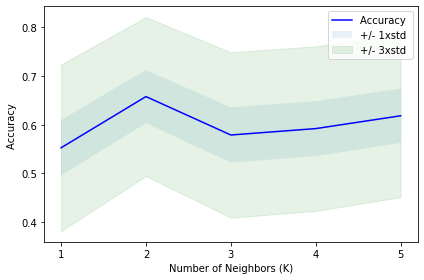

In [53]:
plt.figure()
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()

In [54]:
XT = full_wild_fire_k[["Temperature_Max","Temperature_Avg","Temperature_Min","DewPoint_Max","DewPoint_Avg","DewPoint_Min","Humidity_Max","Humidity_Avg","Humidity_Min","WindSpeed_Max","WindSpeed_Avg","WindSpeed_Min","Pressure_Max","Pressure_Avg","Pressure_Min","day_of_year","month","week",]] .values  #.astype(float)
XTp=full_wild_fire_k[["Temperature_Max","Temperature_Avg","Temperature_Min","DewPoint_Max","DewPoint_Avg","DewPoint_Min","Humidity_Max","Humidity_Avg","Humidity_Min","WindSpeed_Max","WindSpeed_Avg","WindSpeed_Min","Pressure_Max","Pressure_Avg","Pressure_Min","day_of_year","month","week",]]
XT[0:5]

array([[ 55. ,  38.3,  23. ,  25. ,  20.5,  18. ,  86. ,  55.2,  24. ,
         17. ,   7.2,   0. ,  28.1,  28. ,  27.9,  99. ,   4. ,  14. ],
       [ 52. ,  44.6,  34. ,  34. ,  14.1,   0. ,  76. ,  47.1,  24. ,
         20. ,  11.4,   3. ,  27.8,  27.6,  27.3, 111. ,   4. ,  16. ],
       [ 48. ,  43.6,  37. ,  45. ,  41. ,  36. , 100. ,  90.2,  76. ,
         13. ,   7.3,   2. ,  27.3,  27.2,  27.1, 121. ,   4. ,  18. ],
       [ 50. ,  42.4,  34. ,  39. ,  34.3,   0. , 100. ,  79. ,  47. ,
         17. ,   5.7,   0. ,  27.4,  27.4,  27.3, 124. ,   5. ,  18. ],
       [ 54. ,  44.4,  32. ,  28. ,  24.6,  21. ,  75. ,  47.5,  33. ,
         18. ,   9. ,   2. ,  27.9,  27.9,  27.7, 126. ,   5. ,  18. ]])

In [55]:
yt = full_wild_fire_k['Size (ha)'].values
yt[0:5]

array([1., 1., 1., 2., 1.])

In [56]:
from sklearn.tree import DecisionTreeClassifier


In [57]:
#from sklearn import preprocessing
#le_sex = preprocessing.LabelEncoder()
#le_sex.fit(['F','M'])
#X[:,1] = le_sex.transform(X[:,1]) 


#le_BP = preprocessing.LabelEncoder()
#le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
#X[:,2] = le_BP.transform(X[:,2])


#le_Chol = preprocessing.LabelEncoder()
#le_Chol.fit([ 'NORMAL', 'HIGH'])
#X[:,3] = le_Chol.transform(X[:,3]) 

#X[0:5]

In [58]:
#from sklearn.model_selection import train_test_split
#XT_train, XT_test, yt_train, yt_test = train_test_split( XT, yt, test_size=0.3, random_state=3)
XT_trainset, XT_testset, yt_trainset, yt_testset = train_test_split( XT, yt, test_size=0.2, random_state=randomtype)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (302, 18) (302,)
Test set: (76, 18) (76,)


In [59]:
wildFireTree = DecisionTreeClassifier(criterion="entropy", max_depth = NewDepth)

#wildFireTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4, min_samples_split=14, min_samples_leaf=3)
wildFireTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [60]:
wildFireTree.fit(XT_trainset,yt_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [61]:
predTree = wildFireTree.predict(XT_testset)

In [62]:
print (predTree [0:5])
print (yt_testset [0:5])

[1. 1. 1. 3. 1.]
[1. 1. 1. 1. 1.]


In [63]:
#from sklearn import metrics
#import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(yt_testset, predTree))

DecisionTrees's Accuracy:  0.618421052631579


In [64]:

from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree


In [65]:
wildFireTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [66]:
#%matplotlib inline 
#plt.figure()
#dot_data = StringIO()
#filename = "wildFireTree.png"
#featureNames = XTp.columns[0:18]
#out=tree.export_graphviz(wildFireTree,feature_names=featureNames, out_file=dot_data, class_names= np.char.mod('%s', np.array(np.unique(yt_trainset))).tolist(), filled=True,  special_characters=True,rotate=False)  
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png(filename)
#img = mpimg.imread(filename)
#plt.figure(figsize=(100, 200))
#plt.imshow(img,interpolation='nearest')

In [67]:
#churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
#churn_df['churn'] = churn_df['churn'].astype('int')
#churn_df.head()

In [68]:
#X_LR = full_wild_fire_k[["Temperature_Max","Temperature_Avg","Temperature_Min","DewPoint_Max","DewPoint_Avg","DewPoint_Min","Humidity_Max","Humidity_Avg","Humidity_Min","WindSpeed_Max","WindSpeed_Avg","WindSpeed_Min","Pressure_Max","Pressure_Avg","Pressure_Min","day_of_year","month","week",]] .values
#X_LR[0:5]
X_LR = np.asarray(full_wild_fire_k[["Temperature_Max","Temperature_Avg","Temperature_Min","DewPoint_Max","DewPoint_Avg","DewPoint_Min","Humidity_Max","Humidity_Avg","Humidity_Min","WindSpeed_Max","WindSpeed_Avg","WindSpeed_Min","Pressure_Max","Pressure_Avg","Pressure_Min","day_of_year","month","week",]])
X_LR[0:5]


array([[ 55. ,  38.3,  23. ,  25. ,  20.5,  18. ,  86. ,  55.2,  24. ,
         17. ,   7.2,   0. ,  28.1,  28. ,  27.9,  99. ,   4. ,  14. ],
       [ 52. ,  44.6,  34. ,  34. ,  14.1,   0. ,  76. ,  47.1,  24. ,
         20. ,  11.4,   3. ,  27.8,  27.6,  27.3, 111. ,   4. ,  16. ],
       [ 48. ,  43.6,  37. ,  45. ,  41. ,  36. , 100. ,  90.2,  76. ,
         13. ,   7.3,   2. ,  27.3,  27.2,  27.1, 121. ,   4. ,  18. ],
       [ 50. ,  42.4,  34. ,  39. ,  34.3,   0. , 100. ,  79. ,  47. ,
         17. ,   5.7,   0. ,  27.4,  27.4,  27.3, 124. ,   5. ,  18. ],
       [ 54. ,  44.4,  32. ,  28. ,  24.6,  21. ,  75. ,  47.5,  33. ,
         18. ,   9. ,   2. ,  27.9,  27.9,  27.7, 126. ,   5. ,  18. ]])

In [69]:
y_LR = np.asarray(full_wild_fire_k['Size (ha)'].astype('int'))
y_LR[0:5]

array([1, 1, 1, 2, 1])

In [70]:
from sklearn import preprocessing
X_LR = preprocessing.StandardScaler().fit(X_LR).transform(X_LR)
X_LR[0:5]

array([[-2.13936986, -2.70124731, -2.34474508, -2.98625972, -2.3281587 ,
        -0.8717586 , -0.2622228 , -0.34823164, -0.30108414,  0.14944415,
         0.14008178, -0.40278333,  3.12879359,  2.25136354,  0.22740338,
        -1.72776054, -1.48432957, -1.82669997],
       [-2.47589995, -1.89436979, -1.15636745, -1.86095449, -3.00901088,
        -1.99047712, -1.24361112, -0.9594186 , -0.30108414,  0.55879117,
         1.41308602,  1.84724767,  0.78064539, -0.11256818,  0.03694885,
        -1.45462347, -1.48432957, -1.50842728],
       [-2.92460674, -2.02244558, -0.83226446, -0.48558144, -0.14730408,
         0.24695991,  1.11172083,  2.29269965,  3.74687068, -0.39635187,
         0.17039141,  1.09723734, -3.13293495, -2.4764999 , -0.02653599,
        -1.22700925, -1.48432957, -1.1901546 ],
       [-2.70025335, -2.17613654, -1.15636745, -1.23578492, -0.8600712 ,
        -1.99047712,  1.11172083,  1.44760163,  1.48935741,  0.14944415,
        -0.31456259, -0.40278333, -2.35021888, -1.294

In [71]:
from sklearn.model_selection import train_test_split
X_LR_train, X_LR_test, y_LR_train, y_LR_test = train_test_split( X_LR, y_LR, test_size=0.2, random_state=randomtype)
print ('Train set:', X_LR_train.shape,  y_LR_train.shape)
print ('Test set:', X_LR_test.shape,  y_LR_test.shape)

Train set: (302, 18) (302,)
Test set: (76, 18) (76,)


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#LR = LogisticRegression(C=0.005, solver='saga').fit(X_LR_train,y_LR_train)
LR = LogisticRegression(C=0.0005, solver='liblinear').fit(X_LR_train,y_LR_train)
#LR=LogisticRegression().fit(X_LR_train,y_LR_train)
LR

LogisticRegression(C=0.0005, solver='liblinear')

In [73]:
y_LR_hat = LR.predict(X_LR_test)
print(y_LR_hat)
print(y_LR_test)

[1 1 1 3 1 3 1 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 1 3 3 3 1 1 1 3 3 1 1 1 1 3 3
 3 3 3 1 1 3 1 3 3 3 3 1 1 1 1 1 1 1 3 3 3 3 1 1 1 3 1 1 1 1 1 3 1 1 3 3 3
 1 1]
[1 1 1 1 1 2 3 1 2 3 1 1 1 3 1 1 2 1 2 1 3 1 3 2 2 1 1 3 2 1 2 2 1 1 1 1 2
 2 1 1 1 3 1 1 1 3 3 1 1 1 1 2 1 1 1 1 1 2 3 1 1 1 1 1 2 1 2 1 3 2 2 1 1 1
 1 1]


In [74]:
y_LR_hat_prob = LR.predict_proba(X_LR_test)
y_LR_hat_prob

array([[0.34505932, 0.32844268, 0.326498  ],
       [0.34231706, 0.3278444 , 0.32983854],
       [0.35202438, 0.33271956, 0.31525606],
       [0.32851576, 0.33352914, 0.33795511],
       [0.34855731, 0.33682633, 0.31461636],
       [0.31608076, 0.33512549, 0.34879375],
       [0.3385738 , 0.33087505, 0.33055115],
       [0.35066124, 0.3288559 , 0.32048286],
       [0.32701786, 0.33167932, 0.34130282],
       [0.33272334, 0.33156332, 0.33571334],
       [0.33414207, 0.33142004, 0.3344379 ],
       [0.33455422, 0.33089391, 0.33455187],
       [0.33460785, 0.32683871, 0.33855344],
       [0.33389262, 0.33001188, 0.3360955 ],
       [0.3578106 , 0.32989049, 0.31229892],
       [0.34828787, 0.32583435, 0.32587778],
       [0.34333857, 0.33044422, 0.32621721],
       [0.33750203, 0.33253539, 0.32996258],
       [0.35914999, 0.32738832, 0.31346169],
       [0.32908697, 0.33091715, 0.33999588],
       [0.33883244, 0.33078249, 0.33038506],
       [0.35682718, 0.330862  , 0.31231082],
       [0.

In [75]:
#from sklearn.metrics import jaccard_score
#jaccard_score(y_LR_test, y_LR_hat.astype('int'),pos_label=2,average='weighted')
## probles

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_LR_test, y_LR_hat, labels=[1,2,3]))

[[30  0 18]
 [ 9  0  8]
 [ 5  0  6]]


Confusion matrix, without normalization
[[30  0 18]
 [ 9  0  8]
 [ 5  0  6]]


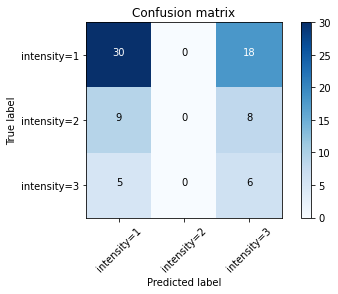

In [77]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_LR_test, y_LR_hat, labels=[1,2,3])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['intensity=1','intensity=2','intensity=3'],normalize= False,  title='Confusion matrix')

In [78]:
print (classification_report(y_LR_test,  y_LR_hat))


              precision    recall  f1-score   support

           1       0.68      0.62      0.65        48
           2       0.00      0.00      0.00        17
           3       0.19      0.55      0.28        11

    accuracy                           0.47        76
   macro avg       0.29      0.39      0.31        76
weighted avg       0.46      0.47      0.45        76



C:\Users\shahab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [79]:
#from sklearn.metrics import log_loss
#log_loss(y_LR_test,  y_LR_hat.astype('int'))

In [80]:
print("LogisticRegression's Accuracy: ", metrics.accuracy_score(y_LR_test, y_LR_hat))
print("KNeighbors' Accuracy: ", metrics.accuracy_score(y_test_f, yhat_f))
print("DecisionTrees' Accuracy: ", metrics.accuracy_score(yt_testset, predTree))

LogisticRegression's Accuracy:  0.47368421052631576
KNeighbors' Accuracy:  0.6578947368421053
DecisionTrees' Accuracy:  0.618421052631579


Confusion matrix, without normalization
[[30  0 18]
 [ 9  0  8]
 [ 5  0  6]]


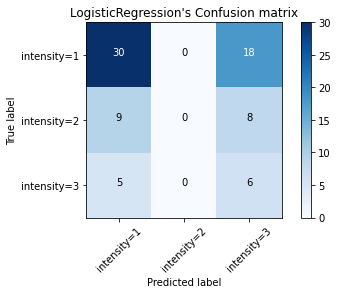

In [81]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_LR_test, y_LR_hat, labels=[1,2,3])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['intensity=1','intensity=2','intensity=3'],normalize= False,  title="LogisticRegression's Confusion matrix")

In [82]:
print("LogisticRegression's Report")
print (classification_report(y_LR_test,  y_LR_hat))


LogisticRegression's Report
              precision    recall  f1-score   support

           1       0.68      0.62      0.65        48
           2       0.00      0.00      0.00        17
           3       0.19      0.55      0.28        11

    accuracy                           0.47        76
   macro avg       0.29      0.39      0.31        76
weighted avg       0.46      0.47      0.45        76



C:\Users\shahab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Confusion matrix, without normalization
[[42  4  2]
 [12  5  0]
 [ 8  0  3]]


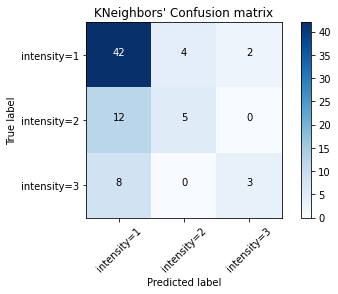

In [83]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_f, yhat_f, labels=[1,2,3])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['intensity=1','intensity=2','intensity=3'],normalize= False,  title="KNeighbors' Confusion matrix")

In [84]:
print("KNeighbors' Report")
print (classification_report(y_test_f,  yhat_f))


KNeighbors' Report
              precision    recall  f1-score   support

         1.0       0.68      0.88      0.76        48
         2.0       0.56      0.29      0.38        17
         3.0       0.60      0.27      0.37        11

    accuracy                           0.66        76
   macro avg       0.61      0.48      0.51        76
weighted avg       0.64      0.66      0.62        76



Confusion matrix, without normalization
[[41  1  6]
 [12  2  3]
 [ 7  0  4]]


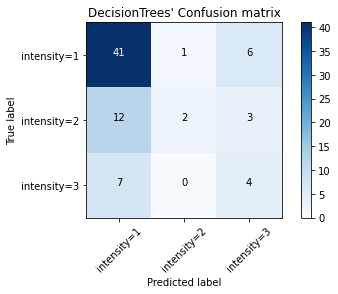

In [85]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(yt_testset, predTree, labels=[1,2,3])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['intensity=1','intensity=2','intensity=3'],normalize= False,  title="DecisionTrees' Confusion matrix")

In [86]:
print("DecisionTrees' Report")
print (classification_report(yt_testset,  predTree))

DecisionTrees' Report
              precision    recall  f1-score   support

         1.0       0.68      0.85      0.76        48
         2.0       0.67      0.12      0.20        17
         3.0       0.31      0.36      0.33        11

    accuracy                           0.62        76
   macro avg       0.55      0.45      0.43        76
weighted avg       0.63      0.62      0.57        76



In [87]:
X_SVM = np.asarray(full_wild_fire_k[["Temperature_Max","Temperature_Avg","Temperature_Min","DewPoint_Max","DewPoint_Avg","DewPoint_Min","Humidity_Max","Humidity_Avg","Humidity_Min","WindSpeed_Max","WindSpeed_Avg","WindSpeed_Min","Pressure_Max","Pressure_Avg","Pressure_Min","day_of_year","month","week",]])
X_SVM[0:5]

array([[ 55. ,  38.3,  23. ,  25. ,  20.5,  18. ,  86. ,  55.2,  24. ,
         17. ,   7.2,   0. ,  28.1,  28. ,  27.9,  99. ,   4. ,  14. ],
       [ 52. ,  44.6,  34. ,  34. ,  14.1,   0. ,  76. ,  47.1,  24. ,
         20. ,  11.4,   3. ,  27.8,  27.6,  27.3, 111. ,   4. ,  16. ],
       [ 48. ,  43.6,  37. ,  45. ,  41. ,  36. , 100. ,  90.2,  76. ,
         13. ,   7.3,   2. ,  27.3,  27.2,  27.1, 121. ,   4. ,  18. ],
       [ 50. ,  42.4,  34. ,  39. ,  34.3,   0. , 100. ,  79. ,  47. ,
         17. ,   5.7,   0. ,  27.4,  27.4,  27.3, 124. ,   5. ,  18. ],
       [ 54. ,  44.4,  32. ,  28. ,  24.6,  21. ,  75. ,  47.5,  33. ,
         18. ,   9. ,   2. ,  27.9,  27.9,  27.7, 126. ,   5. ,  18. ]])

In [88]:
y_SVM = np.asarray(full_wild_fire_k['Size (ha)'].astype('int'))
y_SVM[0:5]

array([1, 1, 1, 2, 1])

In [89]:
#from sklearn.model_selection import train_test_split
X_SVM_train, X_SVM_test, y_SVM_train, y_SVM_test = train_test_split( X_SVM, y_SVM, test_size=0.2, random_state=randomtype)
print ('Train set:', X_SVM_train.shape,  y_SVM_train.shape)
print ('Test set:', X_SVM_test.shape,  y_SVM_test.shape)

Train set: (302, 18) (302,)
Test set: (76, 18) (76,)


In [90]:
from sklearn import svm
#clf = svm.SVC(kernel='sigmoid')
clf = svm.SVC(kernel='poly')
clf.fit(X_SVM_train, y_SVM_train) 

SVC(kernel='poly')

In [91]:
y_SVM_hat = clf.predict(X_SVM_test)
y_SVM_hat [0:5]

array([1, 1, 1, 1, 1])

In [92]:
#from sklearn.metrics import classification_report, confusion_matrix
#import itertools

In [93]:
print("SVM's Accuracy: ", metrics.accuracy_score(y_SVM_test, y_SVM_hat))
print("LogisticRegression's Accuracy: ", metrics.accuracy_score(y_LR_test, y_LR_hat))
print("KNeighbors' Accuracy: ", metrics.accuracy_score(y_test_f, yhat_f))
print("DecisionTrees' Accuracy: ", metrics.accuracy_score(yt_testset, predTree))

SVM's Accuracy:  0.631578947368421
LogisticRegression's Accuracy:  0.47368421052631576
KNeighbors' Accuracy:  0.6578947368421053
DecisionTrees' Accuracy:  0.618421052631579


Confusion matrix, without normalization
[[48  0  0]
 [17  0  0]
 [11  0  0]]


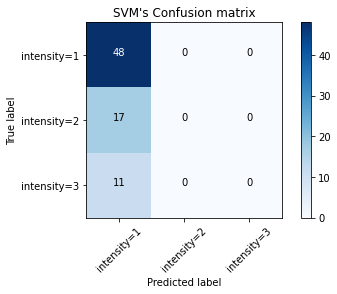

In [94]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_SVM_test, y_SVM_hat, labels=[1,2,3])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['intensity=1','intensity=2','intensity=3'],normalize= False,  title="SVM's Confusion matrix")

In [95]:
print("SVM's Report")
print (classification_report(y_SVM_test,  y_SVM_hat))


SVM's Report
              precision    recall  f1-score   support

           1       0.63      1.00      0.77        48
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        11

    accuracy                           0.63        76
   macro avg       0.21      0.33      0.26        76
weighted avg       0.40      0.63      0.49        76



C:\Users\shahab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [96]:
#from sklearn.metrics import f1_score
#f1_score(y_SVM_test, y_SVM_hat, average='weighted') 

In [97]:
#from sklearn.metrics import jaccard_score
#jaccard_score(y_SVM_test, y_SVM_hat,pos_label=2)

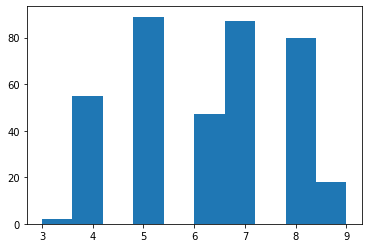

In [98]:
plt.figure()
plt.hist(full_wild_fire["month"])
plt.show() 

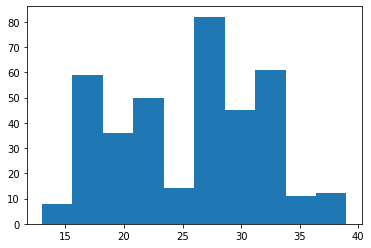

In [99]:
plt.figure()
plt.hist(full_wild_fire["week"])
plt.show() 

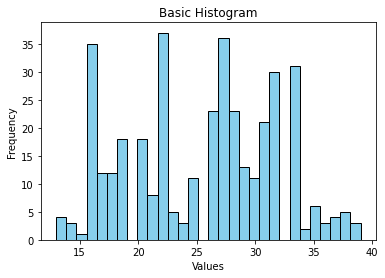

In [100]:
plt.figure()

 
# Plotting a basic histogram
plt.hist(full_wild_fire["week"], bins=30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

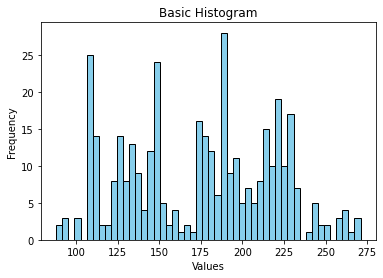

In [101]:
plt.figure()

 
# Plotting a basic histogram
plt.hist(full_wild_fire["day_of_year"], bins=50, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

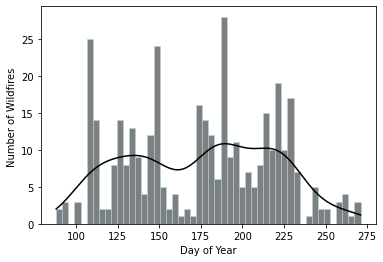

In [102]:
import seaborn as sns

plt.figure()

# Creating a customized histogram with a density plot
sns.histplot(full_wild_fire["day_of_year"], bins=50, kde=True, color='black', edgecolor='lightblue')
#sns.histplot( full_wild_fire.index.month, bins=60, kde=True, color='lightgreen', edgecolor='red')

# Adding labels and title
plt.xlabel('Day of Year')
plt.ylabel('Number of Wildfires ')
#plt.title('')
 
# Display the plot
plt.show()

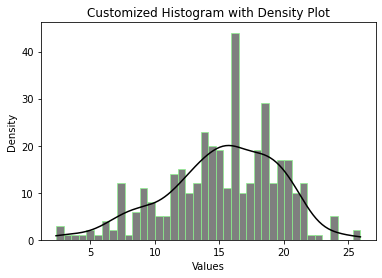

In [103]:
plt.figure()

# Creating a customized histogram with a density plot
sns.histplot((full_wild_fire["Temperature_Avg"]-32)/1.8, bins=40, kde=True, color='black', edgecolor='lightgreen')
#sns.histplot( full_wild_fire.index.month, bins=60, kde=True, color='lightgreen', edgecolor='red')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Customized Histogram with Density Plot')
 
# Display the plot
plt.show()

In [104]:
weatherD=weather
weatherD=weatherD.set_index("time")


<Axes: xlabel='time'>

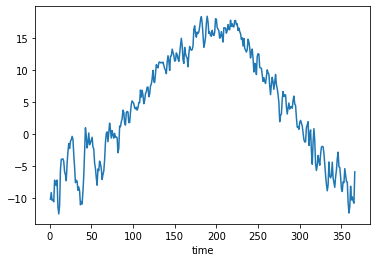

In [105]:
plt.figure()

#TTTT=weatherD.groupby(weatherD.index.month)["Temperature_Avg"].transform('mean')
TTTTT = weatherD.groupby([weatherD.index.day_of_year])["Temperature_Avg"].mean()

((TTTTT-32)/1.8).plot()

Text(0, 0.5, 'Temperature')

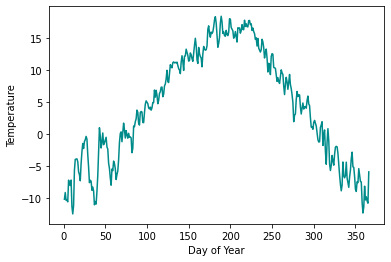

In [106]:
plt.figure()

plt.plot((TTTTT-32)/1.8,'darkcyan')
plt.xlabel('Day of Year')
plt.ylabel('Temperature')

In [107]:
TTTTT.head(20)

time
1     13.600000
2     15.483333
3     13.300000
4     13.366667
5     12.866667
6     18.966667
7     17.900000
8     17.466667
9     19.000000
10    11.533333
11     9.466667
12    11.800000
13    21.700000
14    24.816667
15    24.900000
16    24.966667
17    24.200000
18    21.316667
19    20.516667
20    18.800000
Name: Temperature_Avg, dtype: float64

In [108]:
weatherD

,Temperature_Max,Temperature_Avg,Temperature_Min,DewPoint_Max,DewPoint_Avg,DewPoint_Min,Humidity_Max,Humidity_Avg,Humidity_Min,WindSpeed_Max,WindSpeed_Avg,WindSpeed_Min,Pressure_Max,Pressure_Avg,Pressure_Min,Precipitation_Total
time,,,,,,,,,,,,,,,,
2012-01-01,36,9.0,-2,27,5.5,-6,93,86.0,70,18,6.1,0,28.0,27.9,27.6,0
2012-01-02,37,35.2,32,30,16.4,0,100,78.8,56,24,9.3,0,27.5,27.4,27.4,0
2012-01-03,43,38.0,32,34,18.9,0,100,76.0,57,33,16.1,0,27.5,27.4,27.4,0
2012-01-04,45,42.2,36,34,15.8,0,93,69.3,61,30,18.3,7,27.4,27.3,27.2,0
2012-01-05,36,31.9,27,30,21.6,0,93,83.5,70,14,10.9,6,27.7,27.6,27.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,1,-7.3,-22,-2,-11.5,-29,92,81.7,69,6,1.4,0,28.0,27.9,27.9,0
2017-12-28,1,-14.1,-27,-2,-19.0,-35,92,78.9,69,18,8.0,0,28.0,27.9,27.7,0
2017-12-29,0,-3.9,-6,-4,-10.0,-13,85,75.1,65,15,11.2,8,27.9,27.8,27.6,0


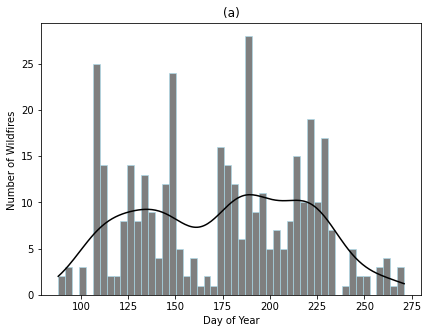

Text(0.5, 1.0, '(b)')

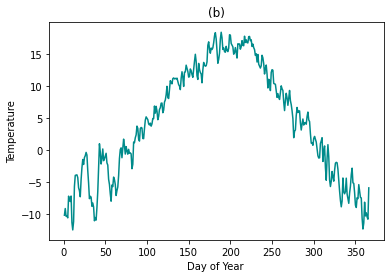

In [109]:
rows = 1
columns = 2
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(rows,columns, 1)
# Creating a customized histogram with a density plot
sns.histplot(full_wild_fire["day_of_year"], bins=50, kde=True, color='black', edgecolor='lightblue')
#sns.histplot( full_wild_fire.index.month, bins=60, kde=True, color='lightgreen', edgecolor='red')

# Adding labels and title
plt.xlabel('Day of Year')
plt.ylabel('Number of Wildfires ')
 
plt.title("(a)" ) 
#plt.title('')
 
# Display the plot
plt.show()


fig.add_subplot(rows,columns, 2)
plt.plot((TTTTT-32)/1.8,'darkcyan')
plt.xlabel('Day of Year ')
plt.ylabel('Temperature')
plt.title("(b)" ) 

                
#plt.show(block=True)